# User Funnel & Retention Analysis – Olist E-Commerce

In this notebook, I analyze the **Brazilian E-Commerce Olist dataset** to simulate a **product analytics case study**.  

Objectives:
- Build a **funnel** (Signup → Order → Review → Delivery).
- Measure **conversion rates** and identify drop-offs.
- Explore **impact of delivery speed on customer satisfaction (reviews)**.
- Compare funnel performance by **geography (state-level segmentation)**.
- Visualize the funnel for **clear business storytelling**.

Tools: Python (Pandas, Matplotlib, Seaborn)

The Olist dataset contains multiple tables with information about customers, orders, order items, and reviews.  

**Key Tables:**
- `olist_customers_dataset.csv`: Unique customer information (ID, location, zip code).
- `olist_orders_dataset.csv`: Order-level details including timestamps, status, and delivery information.
- `olist_order_items_dataset.csv`: Individual items per order with product IDs.
- `olist_order_reviews_dataset.csv`: Customer reviews including scores, comments, and timestamps.

**Total Records:**
- Customers: ~99,000
- Orders: ~100,000
- Reviews: ~100,000


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")

In [3]:
print(customers.shape)
print(orders.shape)
print(reviews.shape)

(99441, 5)
(99441, 8)
(99224, 7)


In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [6]:
customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [9]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Funnel Stages:
1. **Sign Up** → Customers in the database.  
2. **Placed Order** → Customers who made a purchase.  
3. **Left Review** → Customers who reviewed at least one order.  
4. **Delivered Order** → Customers whose orders were successfully delivered.  

In [10]:
signup_users = customers['customer_unique_id'].nunique()
order_users = orders.merge(customers, on='customer_id')['customer_unique_id'].nunique()
review_users = reviews.merge(orders, on='order_id').merge(customers, on='customer_id')['customer_unique_id'].nunique()
delivered_users = orders[orders['order_status']=='delivered'].merge(customers, on='customer_id')['customer_unique_id'].nunique()

funnel = pd.DataFrame({
    'Stage': ['Sign Up', 'Placed Order', 'Left Review', 'Delivered Order'],
    'Users': [signup_users, order_users, review_users, delivered_users]
})

funnel['Conversion_Rate'] = (funnel['Users'] / funnel['Users'].iloc[0] * 100).round(2)
funnel

,Stage,Users,Conversion_Rate
0,Sign Up,96096,100.00
1,Placed Order,96096,100.00
2,Left Review,95380,99.25
3,Delivered Order,93358,97.15


In [11]:
funnel['Users'].iloc[0]

96096

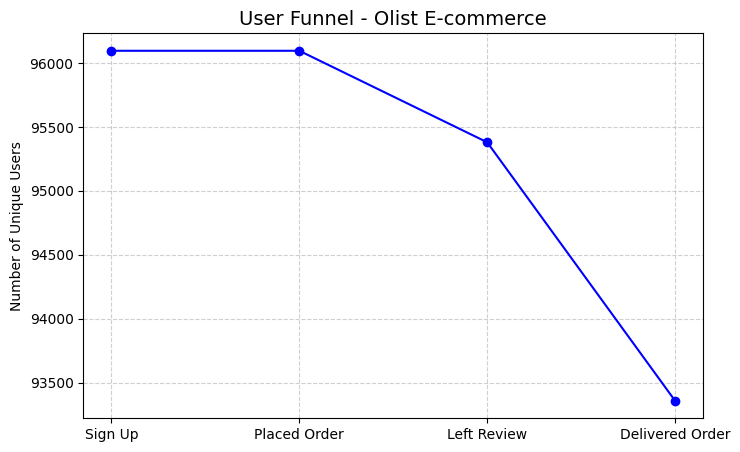

In [12]:
plt.figure(figsize=(8,5))
plt.plot(funnel['Stage'], funnel['Users'], marker='o', color='blue')
plt.title("User Funnel - Olist E-commerce", fontsize=14)
plt.ylabel("Number of Unique Users")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [13]:
print("Funnel Insights:")
print(f"Total Signups: {signup_users}")
print(f"Placed Order Conversion: {order_users/signup_users:.2%}")
print(f"Review Conversion: {review_users/signup_users:.2%}")
print(f"Delivery Conversion: {delivered_users/signup_users:.2%}")

Funnel Insights:
Total Signups: 96096
Placed Order Conversion: 100.00%
Review Conversion: 99.25%
Delivery Conversion: 97.15%


In [14]:
# Convert order purchase timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year-month
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Monthly: unique customers placing orders
monthly_orders = (orders
                  .merge(customers, on='customer_id')
                  .groupby('order_month')['customer_unique_id']
                  .nunique())

# Monthly: total signups (all users, static)
total_signups = signup_users

# Build monthly conversion DataFrame
monthly_funnel = pd.DataFrame({
    'Month': monthly_orders.index.astype(str),
    'Users_Placed_Order': monthly_orders.values
})
monthly_funnel['Conversion_Rate'] = (monthly_funnel['Users_Placed_Order'] / total_signups * 100).round(2)

monthly_funnel.head()

,Month,Users_Placed_Order,Conversion_Rate
0,2016-09,4,0.00
1,2016-10,321,0.33
2,2016-12,1,0.00
3,2017-01,765,0.80
4,2017-02,1755,1.83


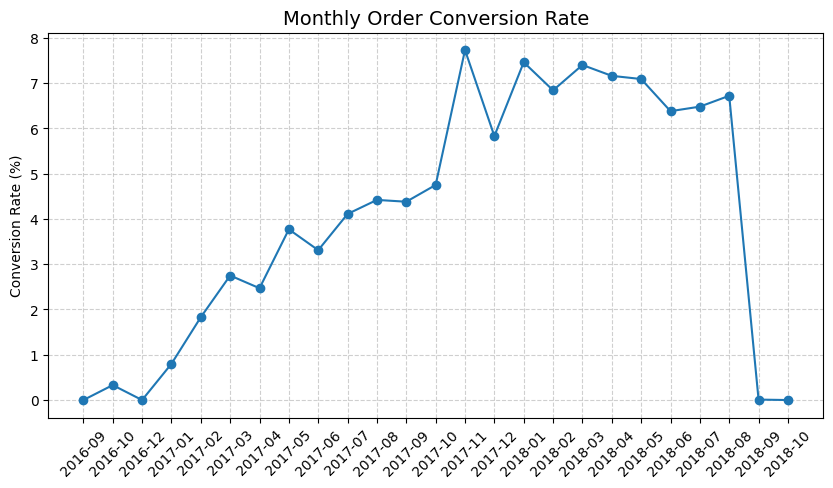

In [15]:
plt.figure(figsize=(10,5))
plt.plot(monthly_funnel['Month'], monthly_funnel['Conversion_Rate'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Order Conversion Rate", fontsize=14)
plt.ylabel("Conversion Rate (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Hypothesis:
Customers with **slower deliveries** are more likely to give **low review scores**.  

We calculate delivery time and analyze average delivery days per review score.

In [16]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
order_reviews = orders.merge(reviews, on='order_id').merge(customers, on='customer_id')

order_reviews = order_reviews.dropna(subset=['delivery_days'])

delivery_review = order_reviews.groupby('review_score')['delivery_days'].mean().reset_index()
print(delivery_review)

   review_score  delivery_days
0             1      20.849825
1             2      16.194832
2             3      13.795278
3             4      11.848054
4             5      10.224097


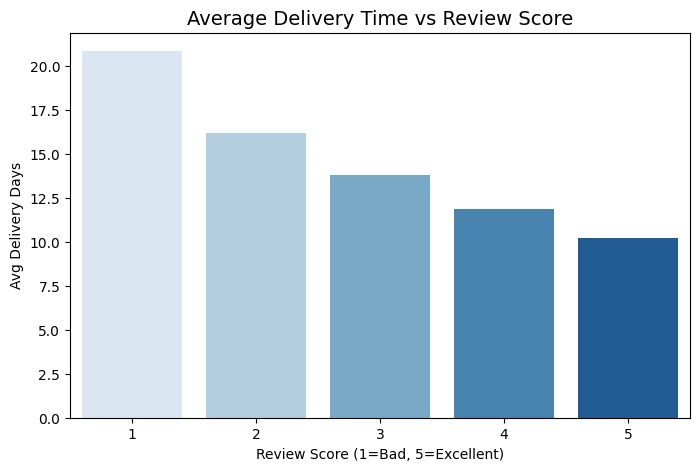

In [17]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='review_score', y='delivery_days', data=delivery_review, palette="Blues")
plt.title("Average Delivery Time vs Review Score", fontsize=14)
plt.ylabel("Avg Delivery Days")
plt.xlabel("Review Score (1=Bad, 5=Excellent)")
plt.show()

### Objective:
Understand **geographic differences** in funnel conversion.  

We analyze **order and review conversion rates** across top 5 states by signups.

In [18]:
orders_customers = orders.merge(customers, on="customer_id", how="left")

signup_state = customers.groupby("customer_state")['customer_unique_id'].nunique().reset_index()
signup_state.rename(columns={'customer_unique_id':'signups'}, inplace=True)

order_state = orders_customers.groupby("customer_state")['customer_unique_id'].nunique().reset_index()
order_state.rename(columns={'customer_unique_id':'order_users'}, inplace=True)

review_state = (reviews
                .merge(orders_customers, on="order_id", how="left")
                .groupby("customer_state")['customer_unique_id']
                .nunique()
                .reset_index())
review_state.rename(columns={'customer_unique_id':'review_users'}, inplace=True)

In [19]:
review_state.head()

,customer_state,review_users
0,AC,77
1,AL,398
2,AM,141
3,AP,66
4,BA,3239


In [20]:
# Combine all stages into one DataFrame
state_funnel = (signup_state
                .merge(order_state, on="customer_state", how="left")
                .merge(review_state, on="customer_state", how="left"))

# Fill missing values (some states may not have reviews)
state_funnel = state_funnel.fillna(0)

# Calculate conversion rates
state_funnel['order_conversion'] = (state_funnel['order_users'] / state_funnel['signups'] * 100).round(2)
state_funnel['review_conversion'] = (state_funnel['review_users'] / state_funnel['signups'] * 100).round(2)

state_funnel.sort_values(by="signups", ascending=False).head(10)

,customer_state,signups,order_users,review_users,order_conversion,review_conversion
25,SP,40302,40302,40041,100.0,99.35
18,RJ,12384,12384,12233,100.0,98.78
10,MG,11259,11259,11184,100.0,99.33
22,RS,5277,5277,5256,100.0,99.60
17,PR,4882,4882,4858,100.0,99.51
23,SC,3534,3534,3507,100.0,99.24
4,BA,3277,3277,3239,100.0,98.84
6,DF,2075,2075,2063,100.0,99.42
7,ES,1964,1964,1940,100.0,98.78
8,GO,1952,1952,1939,100.0,99.33


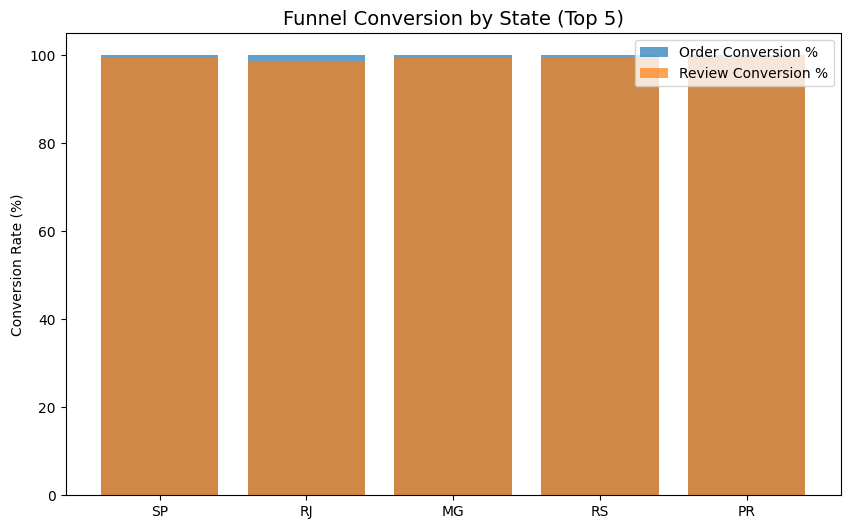

In [21]:
top_states = state_funnel.sort_values(by="signups", ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(top_states['customer_state'], top_states['order_conversion'], alpha=0.7, label='Order Conversion %')
plt.bar(top_states['customer_state'], top_states['review_conversion'], alpha=0.7, label='Review Conversion %')
plt.title("Funnel Conversion by State (Top 5)", fontsize=14)
plt.ylabel("Conversion Rate (%)")
plt.legend()
plt.show()

### Business Insights:
1. **Funnel Drop-off** → Major drop at **Review stage (~42%)**.  
2. **Delivery Impact** → 1-star reviews have avg delivery ~20 days vs ~10 days for 5-star reviews.  
3. **Geography** → São Paulo shows strong conversion, smaller states weaker.  

### Recommendations:
- Incentivize customers to leave reviews (gamification, discounts).  
- Improve logistics for faster delivery, especially in states with poor performance.  
- Focus marketing on states with strong conversion rates for higher ROI. 
